<a href="https://colab.research.google.com/github/Leonardo-Gaspar/DataScienceStudies/blob/main/PCAandClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importando as bibliotecas que serão necessárias para a análise
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# ***Questão 1: Redução de dimensionalidade com PCA***

1. Carregue os dados e analise os atributos disponíveis.

In [3]:
#Carregando os dados
#Como o arquivo esta em txt, adicionamos a separação dos dados ";"
data = pd.read_csv('/content/household_power_consumption.txt', sep = ';')

In [4]:
#Verificando o topo de meus dados, para obter os nomes das colunas e os dados que vamos trabalhar
data.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [5]:
#verificação para ver os tipos de dados que estamos utilizando
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490124 entries, 0 to 490123
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Date                   490124 non-null  object 
 1   Time                   490124 non-null  object 
 2   Global_active_power    490124 non-null  object 
 3   Global_reactive_power  490124 non-null  object 
 4   Voltage                490124 non-null  object 
 5   Global_intensity       490123 non-null  object 
 6   Sub_metering_1         490123 non-null  object 
 7   Sub_metering_2         490123 non-null  object 
 8   Sub_metering_3         486190 non-null  float64
dtypes: float64(1), object(8)
memory usage: 33.7+ MB


In [6]:
#Verificar numeros de linhas e colunas
data.shape

(490124, 9)

2. Faça o pré-processamento, convertendo valores categóricos para numéricos, tratando valores faltantes e normalizando as colunas.

In [7]:
#Essa segunda versão, é a qual irei rodar, por ser a mais apropriada para o tipo de dado que estamos analisando

#Utilizando o recurso do pandas "to_numeric()"
data['Global_active_power'] = pd.to_numeric(data['Global_active_power'], errors='coerce')
data['Global_reactive_power'] = pd.to_numeric(data['Global_reactive_power'], errors='coerce')
data['Voltage'] = pd.to_numeric(data['Voltage'], errors='coerce')
data['Global_intensity'] = pd.to_numeric(data['Global_intensity'], errors='coerce')
data['Sub_metering_1'] = pd.to_numeric(data['Sub_metering_1'], errors='coerce')
data['Sub_metering_2'] = pd.to_numeric(data['Sub_metering_2'], errors='coerce')
data['Sub_metering_3'] = pd.to_numeric(data['Sub_metering_3'], errors='coerce')

In [8]:
#Ja para as datas/horas, irei utilizar um recurso do pandas chamado "to_datetime()"
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.time

#Criando novas colunas para conseguir padronizar os dados
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['Hour'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.hour
data['Minute'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.minute
data['Second'] = pd.to_datetime(data['Time'], format='%H:%M:%S').dt.second

In [9]:
#Excluindo as colunas originais
data = data.drop(columns=['Date', 'Time'])

In [10]:
#Verificando se deu certo
data.isna().sum()

,0
Global_active_power,3933
Global_reactive_power,3933
Voltage,3933
Global_intensity,3934
Sub_metering_1,3934
Sub_metering_2,3934
Sub_metering_3,3934
Year,0
Month,0
Day,0


In [11]:
#Tratando os valores Nan
#Iremos utilizar a mediana para substituir os valores ausentes
data.fillna(data.median(), inplace=True)

In [12]:
#Iremos verificar os valores Nan
data.isna().sum()

,0
Global_active_power,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,0
Year,0
Month,0
Day,0


In [13]:
#Verificando se as conversões deram certo
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 490124 entries, 0 to 490123
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Global_active_power    490124 non-null  float64
 1   Global_reactive_power  490124 non-null  float64
 2   Voltage                490124 non-null  float64
 3   Global_intensity       490124 non-null  float64
 4   Sub_metering_1         490124 non-null  float64
 5   Sub_metering_2         490124 non-null  float64
 6   Sub_metering_3         490124 non-null  float64
 7   Year                   490124 non-null  int32  
 8   Month                  490124 non-null  int32  
 9   Day                    490124 non-null  int32  
 10  Hour                   490124 non-null  int32  
 11  Minute                 490124 non-null  int32  
 12  Second                 490124 non-null  int32  
dtypes: float64(7), int32(6)
memory usage: 37.4 MB


Como podemos ver, a conversão foi um sucessso!!

In [14]:
#Utilizando o método ".iloc" para selecionar as linhas
X = data.iloc[:,0:9].values
X

array([[4.2160e+00, 4.1800e-01, 2.3484e+02, ..., 1.7000e+01, 2.0060e+03,
        1.2000e+01],
       [5.3600e+00, 4.3600e-01, 2.3363e+02, ..., 1.6000e+01, 2.0060e+03,
        1.2000e+01],
       [5.3740e+00, 4.9800e-01, 2.3329e+02, ..., 1.7000e+01, 2.0060e+03,
        1.2000e+01],
       ...,
       [2.2600e-01, 0.0000e+00, 2.4626e+02, ..., 0.0000e+00, 2.0070e+03,
        1.1000e+01],
       [2.2600e-01, 0.0000e+00, 2.4657e+02, ..., 0.0000e+00, 2.0070e+03,
        1.1000e+01],
       [2.2800e-01, 0.0000e+00, 2.4700e+02, ..., 0.0000e+00, 2.0070e+03,
        1.1000e+01]])

In [15]:
#Adotando o valor ao y
y = data['Sub_metering_3']

In [16]:
#Dropando a coluna do original
data = data.drop(columns=['Sub_metering_3'])
data.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Year,Month,Day,Hour,Minute,Second
0,4.216,0.418,234.84,18.4,0.0,1.0,2006,12,16,17,24,0
1,5.360,0.436,233.63,23.0,0.0,1.0,2006,12,16,17,25,0
2,5.374,0.498,233.29,23.0,0.0,2.0,2006,12,16,17,26,0
3,5.388,0.502,233.74,23.0,0.0,1.0,2006,12,16,17,27,0
4,3.666,0.528,235.68,15.8,0.0,1.0,2006,12,16,17,28,0


3. Crie um novo data frame com uma amostra de 5% dos valores iniciais. (sugestão: utilize o método sample)

In [17]:
#Para criar o DF(DataFrame) com uma amostra de 5% dos dados iniciais, utilizarei o sample
#utilizei o random_state para obter uma amostragem aleatória a cada vez
data_sample = data.sample(frac=0.05, random_state=42)
data_sample.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Year,Month,Day,Hour,Minute,Second
463226,0.198,0.000,237.62,0.8,0.0,0.0,2007,11,3,9,50,0
162528,1.278,0.000,239.96,5.2,0.0,0.0,2007,4,8,14,12,0
374764,2.832,0.222,241.74,11.8,0.0,0.0,2007,9,2,23,28,0
37765,1.404,0.296,245.48,5.8,0.0,2.0,2007,1,11,22,49,0
311739,0.356,0.292,234.88,1.8,0.0,1.0,2007,7,21,5,3,0


In [18]:
#Padronizando os dados
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

In [19]:
#Estarei dividindo os dados em treino(80%) e teste(20%)
X_train, X_test, y_train, y_test = train_test_split(scaled_data, y, test_size=0.2, random_state=42)

4. Aplique o algoritmo PCA para reduzir o número original de atributos.

In [20]:
# Aplicando o PCA nos dados de treino
p = 7
pca = PCA(n_components=p)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [21]:
#Conferindo a quantidade de colunas dos dados antes do PCA
X_train.shape, X_test.shape

((392099, 9), (98025, 9))

In [22]:
#Conferindo a diminuição dos dados após PCA
X_train_pca.shape, X_test_pca.shape

((392099, 7), (98025, 7))

5. Calcule o quanto a variância dos novos dados explica os dados originais.

In [23]:
#Agora iremos aplicar o método "explained_variance_ratio" para  calcular a porcentagem da variância dos dados
pca.explained_variance_ratio_

array([0.35845066, 0.15607767, 0.1116116 , 0.10408231, 0.09779109,
       0.08881683, 0.05749803])

In [24]:
#Calculando a variância de acordo com os dados de entrada
total_variancia = sum(pca.explained_variance_ratio_)
print(f'O modelo PCA com {p} variáveis explica{100*(total_variancia): .2f} % dos dados de entrada')

O modelo PCA com 7 variáveis explica 97.43 % dos dados de entrada


In [25]:
#Salvando a amostra em um arquivo csv
data_sample.to_csv('data_sample.csv', index=False)

# ***Questão 2: Agrupamento (Clustering) com K-Means***

1. Carregue o data frame gerado a partir da amostra de 5% da questão 01, ainda com os atributos originais preservados.

In [26]:
#Carregando o data frame da amostra
data_sample = pd.read_csv('/content/data_sample.csv')

In [27]:
#Verificando os dados
data_sample.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Year,Month,Day,Hour,Minute,Second
0,0.198,0.000,237.62,0.8,0.0,0.0,2007,11,3,9,50,0
1,1.278,0.000,239.96,5.2,0.0,0.0,2007,4,8,14,12,0
2,2.832,0.222,241.74,11.8,0.0,0.0,2007,9,2,23,28,0
3,1.404,0.296,245.48,5.8,0.0,2.0,2007,1,11,22,49,0
4,0.356,0.292,234.88,1.8,0.0,1.0,2007,7,21,5,3,0


2. Escolha os atributos que o grupo considerar relevantes como entrada para a técnica de agrupamento (clustering), como "Global_active_power", "Global_reactive_power", "Voltage" etc.

In [28]:
atributos_relevantes = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity']
X_clustering = data_sample[atributos_relevantes]

3. Justifique a escolha dos atributos e explique como eles podem influenciar a formação dos clusters.

In [ ]:
# A escolha veio a partir da influência dos atributos na formação dos clusters, acreditamos que essas 4 colunas,
# estão diretamente ligadas com o resultado que estamos buscando, o consumo de energia.

4. Aplique o algoritmo K-Means, experimentando diferentes valores de K (número de clusters). Em seguida, levante a curva de Elbow e utilize métricas como a inertia e silhouette score para avaliar a qualidade dos clusters.

In [40]:
# Testando com 16 KMeans
k_values = range(2, 18)
inertias = []
silhouette_scores = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_clustering)

    # Armazenando a inércia
    inertias.append(kmeans.inertia_)

    # Calculando o Silhouette Score e armazenando
    score = silhouette_score(X_clustering, kmeans.labels_)
    silhouette_scores.append(score)

# Exibindo resultados
print("Inertias:", inertias)
print("Silhouette Scores:", silhouette_scores)


Inertias: [476831.09827646, 321629.60776537034, 226091.40230053067, 185053.51364698575, 152464.99724613928, 127280.5994077657, 109673.56472977824, 96331.743489601, 86455.62190838325, 77692.67883320447, 71114.81087510055, 65964.07085972255, 61471.758550368926, 57449.56730989685, 54120.12200717739, 51383.26648708835]
Silhouette Scores: [0.5180045669756089, 0.407585930390829, 0.45474602730757596, 0.44590011697909837, 0.44847464051826946, 0.41326445254464533, 0.42037874540294645, 0.42037052581699924, 0.42395174314727385, 0.4026196586407875, 0.4050191713676515, 0.39317626536607114, 0.38385230590679215, 0.38419007668731986, 0.38372838891798544, 0.3635519117224484]


In [43]:
# O número de clusters (grupos) foi adotado com base na curva acima.
modelo_KMeans = KMeans(n_clusters=3)
modelo_KMeans.fit(data_sample)

KMeans(n_clusters=3)

In [44]:
# Adicionando a coluna "target" com os dados originais do dataset, para podermos comparar...
data_sample['clusters'] = modelo_KMeans.predict(data_sample)

In [45]:
#Exibindo os dados simplificados
data_sample

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Year,Month,Day,Hour,Minute,Second,clusters
0,0.198,0.000,237.62,0.8,0.0,0.0,2007,11,3,9,50,0,2
1,1.278,0.000,239.96,5.2,0.0,0.0,2007,4,8,14,12,0,1
2,2.832,0.222,241.74,11.8,0.0,0.0,2007,9,2,23,28,0,0
3,1.404,0.296,245.48,5.8,0.0,2.0,2007,1,11,22,49,0,2
4,0.356,0.292,234.88,1.8,0.0,1.0,2007,7,21,5,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24501,1.354,0.210,235.45,5.8,1.0,0.0,2007,8,25,14,40,0,2
24502,0.184,0.102,240.98,0.8,0.0,0.0,2007,6,14,16,24,0,0
24503,1.372,0.226,238.46,5.8,0.0,2.0,2007,6,15,18,48,0,2
24504,0.282,0.000,244.93,1.2,0.0,0.0,2007,11,11,23,34,0,0


In [46]:
#Exibindo a silhouette
silhouette = silhouette_score(data_sample, data_sample['clusters'])
print(f"Silhouette score: {silhouette:.4f}")

Silhouette score: 0.2316


In [ ]:
#Apesar de não ter sido perfeita, obtivemos um retorno positivo da silhouette

5. Visualize os clusters utilizando gráficos de dispersão.

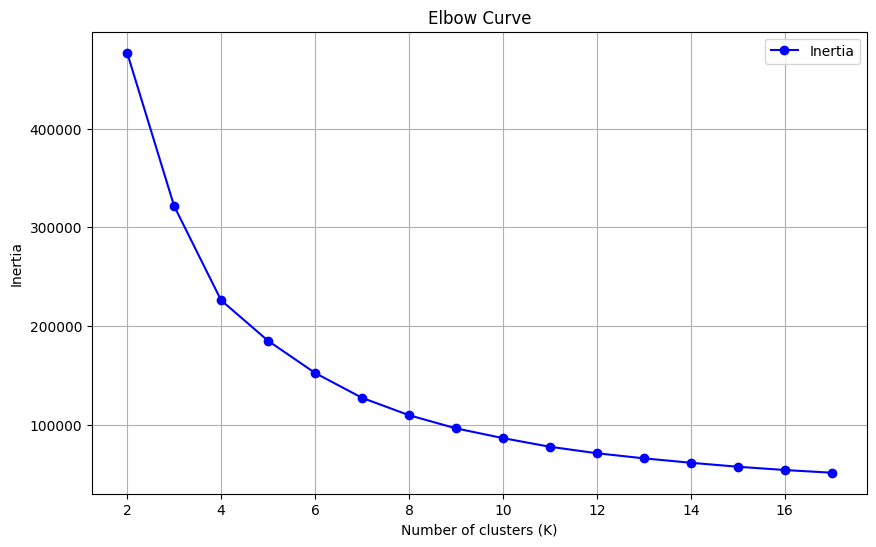

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertias, 'bo-', label='Inertia')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Curve')
plt.legend()
plt.grid(True)
plt.show()

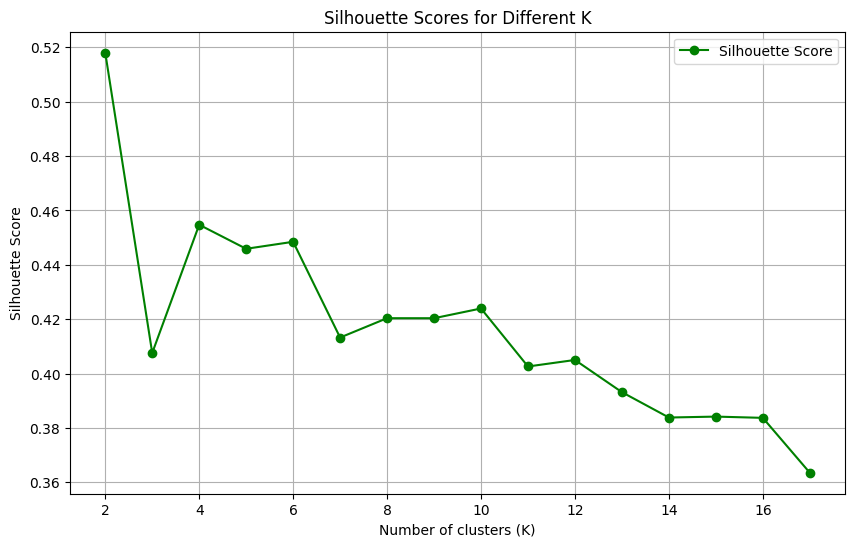

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, 'go-', label='Silhouette Score')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different K')
plt.legend()
plt.grid(True)
plt.show()

6. Repita os itens 4 e 5 agora utilizando como entrada os dados reduzidos pelo algoritmo PCA e analise os resultados.

In [47]:
#Escalonando os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clustering)

# Aplicando PCA = 2
pca = PCA(n_components=2)  # Reduzindo para 2 componentes principais
X_pca = pca.fit_transform(X_scaled)

# Exibinbindo a variância
explained_variance = pca.explained_variance_ratio_
print(f"Variância explicada pelos componentes principais: {explained_variance}")


Variância explicada pelos componentes principais: [0.58276287 0.22849   ]


In [48]:
k_values = range(2, 18)
inertias_pca = []
silhouette_scores_pca = []

#Aplicando um loop para a análise dos dados
for k in k_values:
    kmeans_pca = KMeans(n_clusters=k, random_state=42)
    kmeans_pca.fit(X_pca)

    # Armazenando a inércia
    inertias_pca.append(kmeans_pca.inertia_)

    # Calculando o Silhouette Score e armazenando
    score = silhouette_score(X_pca, kmeans_pca.labels_)
    silhouette_scores_pca.append(score)

# Exibindo resultados
print("Inertias após PCA:", inertias_pca)
print("Silhouette Scores após PCA:", silhouette_scores_pca)


Inertias após PCA: [42399.41993023337, 31504.545924408372, 23246.294116097786, 19159.65411206825, 16202.545804683228, 14320.03126996551, 12473.2345365681, 11131.607642500432, 10082.876514027166, 9084.566778142509, 8469.76378508985, 7873.404677442522, 7334.4085696265265, 6900.690562944296, 6488.812334010067, 6112.508165758677]
Silhouette Scores após PCA: [0.49795730468918825, 0.38118124037287326, 0.3829735340295297, 0.3633577686213051, 0.3644079365855473, 0.33824650112490556, 0.35195796380557737, 0.35796456339122174, 0.3421818937785534, 0.3667020716198486, 0.36689972694392764, 0.364254312010782, 0.365324387937447, 0.3689314885330926, 0.367409676622696, 0.3658083477925041]


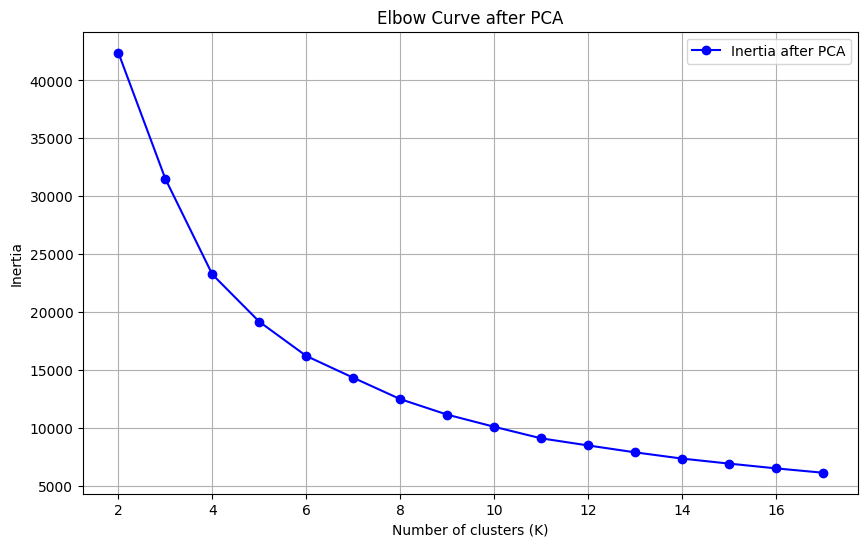

In [49]:
#Exibindo a Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, inertias_pca, 'bo-', label='Inertia after PCA')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Curve after PCA')
plt.legend()
plt.grid(True)
plt.show()

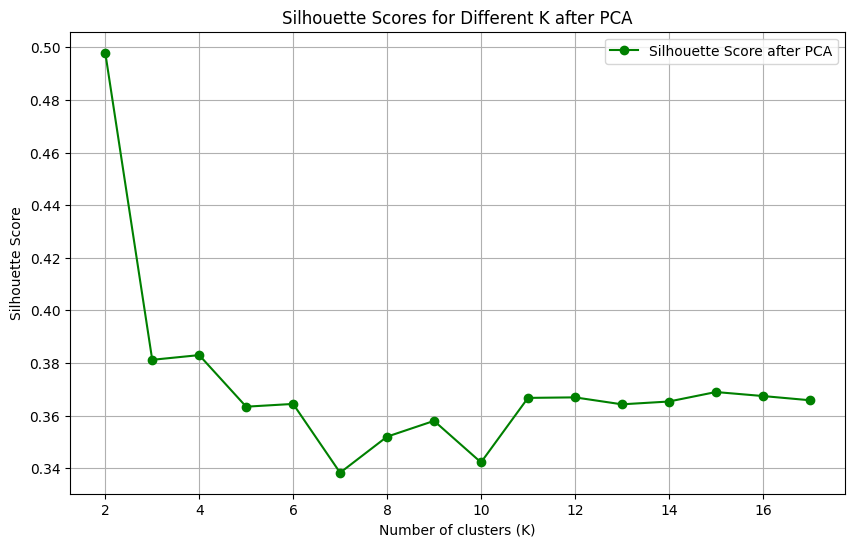

In [50]:
#Exibindo a Silhouette
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores_pca, 'go-', label='Silhouette Score after PCA')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different K after PCA')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Conclusões, após a redução dos dados, podemos observar que a Elbow Curve se mantem a mesma, ja a Silhouette não